## 离群点处理

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
rd = pd.read_excel("./height_weight_outlier.xlsx")
rd

,身高,体重
0,171,53
1,167,56
2,250,64
3,154,49
4,169,50
5,175,66
6,163,52
7,152,47
8,172,58
9,160,50


In [ ]:
a = np.array(rd)
a

array([[171,  53],
       [167,  56],
       [250,  64],
       [154,  49],
       [169,  50],
       [175,  66],
       [163,  52],
       [152,  47],
       [172,  58],
       [160,  50]])

In [ ]:
def three_sigma(data):
  mu, std = np.mean(data, axis=0), np.std(data, axis=0)
  lower, upper = mu - 2 * std, mu + 2 * std
  return lower, upper

lower, upper = three_sigma(a)
lower, upper

(array([120.15830262,  42.29344438]), array([226.44169738,  66.70655562]))

In [ ]:
index = []
for i in range(len(a)):
  if np.array(a[i]< lower).any() or np.array(a[i]> upper).any():
    index.append(i)

index

[2]

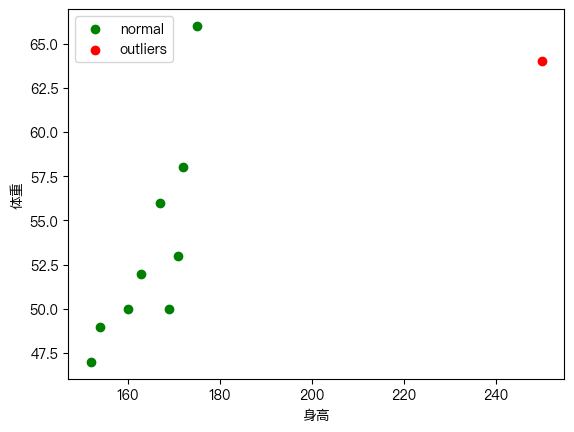

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font",family='PingFang HK')
s1 = np.delete(range(len(a)), index)
plt.scatter(a[s1, 0], a[s1, 1], color='g', label="normal")
plt.scatter(a[index, 0], a[index, 1], color='r', label="outliers")
plt.xlabel('身高')
plt.ylabel('体重')
plt.legend()
plt.show()

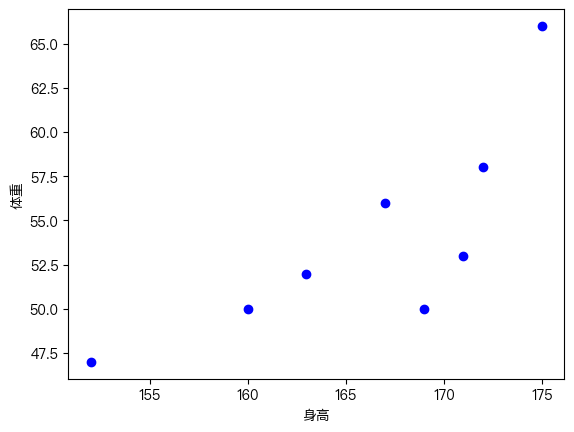

In [ ]:
a = np.delete(a, index, axis=0)
plt.scatter(a[:, 0], a[:, 1], color='b')
plt.xlabel('身高')
plt.ylabel('体重')
plt.show()

## 箱型图判断离群点

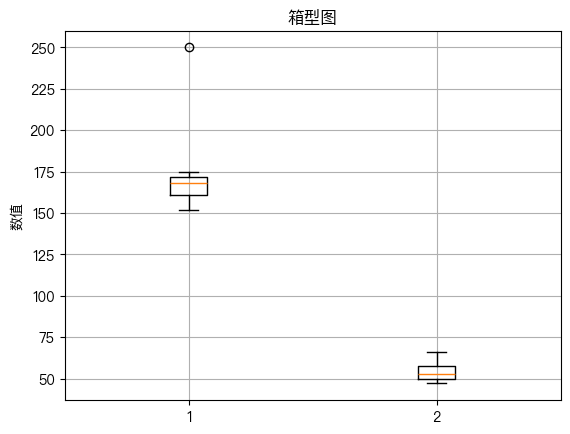

离群点的索引及其具体数据：
索引 2: 数据 [250  64]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
matplotlib.rc("font",family='PingFang HK')
def identify_outliers(data):
    # 计算四分位数和IQR
    Q1 = np.percentile(data, 25, axis=0)
    Q3 = np.percentile(data, 75, axis=0)
    IQR = Q3 - Q1

    # 计算离群点的范围
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 判断每个数据点是否为离群点
    outliers = []
    for i in range(data.shape[0]):
        if (data[i, 0] < lower_bound[0] or data[i, 0] > upper_bound[0]) or \
           (data[i, 1] < lower_bound[1] or data[i, 1] > upper_bound[1]):
            outliers.append(i)

    return outliers

def plot_boxplot(data):

    plt.boxplot(data)
    plt.title("箱型图")
    plt.ylabel("数值")
    plt.grid(True)
    plt.show()

# 测试函数
rd = pd.read_excel("./height_weight_outlier.xlsx")
rd = np.array(rd)
outliers = identify_outliers(rd)
plot_boxplot(rd)

# 打印离群点的索引和具体数值
print("离群点的索引及其具体数据：")
for index in outliers:
    print(f"索引 {index}: 数据 {rd[index]}")